## **Business Understanding**

**Problem Statement**

Given historical data on residential property sales in melbourne, predict the sale price of a house based on its features such as location,property size, number of rooms etc

**Main Objective**

To build a machine learning regression model that can accurately predict house prices in Melbourne 

**Importing Libraries and Warnings**

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Loading the data**

In [80]:
df = pd.read_csv("data/Melbourne_housing_FULL.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


**Data Understanding**

In [81]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [83]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [84]:
df.shape

(34857, 21)

**Handling null values**

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [86]:
#Convertin object columns into categorical
columns_to_convert = df.select_dtypes(include=['object']).columns
df[columns_to_convert] = df[columns_to_convert].astype('category')

In [87]:
#Correlation with columns
df.corr(numeric_only=True).T

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.465238,0.271511,0.085890,0.946755,0.611826,0.393878,0.037402,0.156229,-0.012749,0.004872,0.103235,-0.071677
Price,0.465238,1.000000,-0.211384,0.044950,0.430275,0.429878,0.201803,0.032748,0.100754,-0.333306,-0.215607,0.197874,-0.059017
Distance,0.271511,-0.211384,1.000000,0.481566,0.269524,0.126201,0.241835,0.060862,0.076301,0.323059,-0.100417,0.200946,-0.018140
Postcode,0.085890,0.044950,0.481566,1.000000,0.089292,0.120080,0.067886,0.040664,0.042437,0.089805,-0.231027,0.362895,0.017108
Bedroom2,0.946755,0.430275,0.269524,0.089292,1.000000,0.614892,0.388491,0.037019,0.154157,-0.002022,0.003447,0.106164,-0.053451
Bathroom,0.611826,0.429878,0.126201,0.120080,0.614892,1.000000,0.307518,0.036333,0.147558,0.167955,-0.059183,0.106531,-0.032887
Car,0.393878,0.201803,0.241835,0.067886,0.388491,0.307518,1.000000,0.037829,0.104373,0.128702,-0.009020,0.047213,-0.009617
Landsize,0.037402,0.032748,0.060862,0.040664,0.037019,0.036333,0.037829,1.000000,0.354530,0.044474,0.025318,-0.002582,-0.018195
BuildingArea,0.156229,0.100754,0.076301,0.042437,0.154157,0.147558,0.104373,0.354530,1.000000,0.067811,0.017155,-0.002143,-0.024523
YearBuilt,-0.012749,-0.333306,0.323059,0.089805,-0.002022,0.167955,0.128702,0.044474,0.067811,1.000000,0.091592,-0.022175,0.022420


In [88]:
#Correlation of each column against the target column price
df.corrwith(other=df['Price'],numeric_only=True)

Rooms            0.465238
Price            1.000000
Distance        -0.211384
Postcode         0.044950
Bedroom2         0.430275
Bathroom         0.429878
Car              0.201803
Landsize         0.032748
BuildingArea     0.100754
YearBuilt       -0.333306
Lattitude       -0.215607
Longtitude       0.197874
Propertycount   -0.059017
dtype: float64

Rooms: There is a positive moderate correlation, as number of rooms increases also the price increases

price: Target column

Distance: has a weak negative correlation which implies as distance increases the house prices tend to decrease

Postcode: Has a very weak correlation implying it does not really affect the prices of the houses

Bedroom2: There is a moderate positive correlation implying as the number of bedrooms increases the price of the house also increases

Bathroom: There is also a moderate positive correlation implying as the number of bathrooms increases also the prices increase

Car: There is a weak positive correlation between the number of car spaces and the prices of the house

Landsize: There is a very weak positive correlation suggesting that landsize has little impact on prices

BuildingArea: There is a weak correlation here suggesting that properties with larger building areas tend to have high prices

YearBuilt: Has a moderate negative correlation implying newer houses tend to have higher prices

Lattitude (-0.215607): There's a weak negative correlation (-0.22) between the latitude of the property and the price. This suggests that properties located farther south might have slightly lower prices, on average.

Longtitude (0.197874): There's a weak positive correlation (0.20) between the longitude of the property and the price, indicating that properties located farther to the east might have slightly higher prices, on average.

Propertycount (-0.059017): There's a very weak negative correlation (-0.06) between the property count and the price, but this correlation is not significant.

In [89]:
#Sum of null values in each column
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [90]:
#Handling duplicates
df.drop_duplicates(inplace=True)

In [91]:
# Dropping null values from the price column
df[df['Price'].isnull()]
df = df.dropna(subset=['Price'])


In [92]:
# Dropping unuseful columns due to their low correlation with the target column
df.drop(columns=["Postcode", "Landsize", "BuildingArea",
                 "Lattitude", "Longtitude", "Propertycount"],inplace=True)

**Distance**

In [93]:
df['Distance'].isnull().sum()
df['Distance'].fillna(df['Distance'].median(),inplace=True) #Imputed with the median since the column is rightskewed

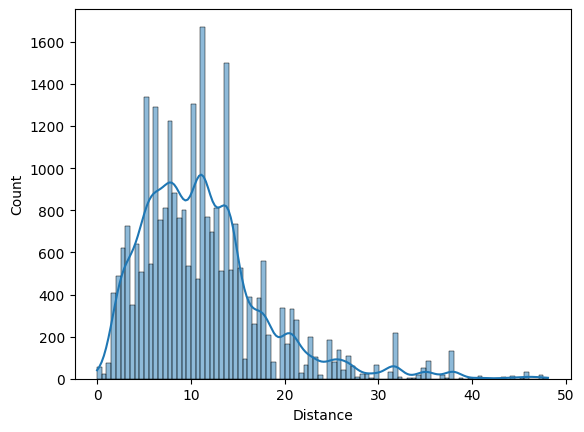

In [94]:
sns.histplot(df['Distance'],kde=True)
plt.show()

**Bedroom2**

In [95]:
df['Bedroom2'].unique()

array([ 2.,  3.,  4., nan,  1.,  6.,  5.,  0.,  8.,  9.,  7., 20., 10.,
       16., 12.])

In [96]:
df['Bedroom2'].isnull().sum()

np.int64(6441)

In [97]:
#Viewing the bedroom2 null values against the rooms column
df.loc[df['Bedroom2'].isna(),['Bedroom2','Rooms']]

,Bedroom2,Rooms
15,NaN,3
16,NaN,2
19,NaN,2
21,NaN,2
22,NaN,1
...,...,...
34838,NaN,2
34839,NaN,2
34840,NaN,2
34844,NaN,1


In [98]:
#For housed whose rooms are 3,2 or 1 we impute the bedroom as 1
df.loc[(df['Bedroom2'].isna()) & (df['Rooms'].isin([1, 2, 3])), 'Bedroom2'] = 1


In [99]:
#Viewing the no of bedrooms against the number of rooms
df.loc[df['Bedroom2'].isna(),['Bedroom2','Rooms']].head(50)

,Bedroom2,Rooms
26,NaN,4
76,NaN,5
77,NaN,4
78,NaN,4
93,NaN,4
97,NaN,4
266,NaN,4
286,NaN,4
287,NaN,4
296,NaN,4


In [100]:
df[df['Bedroom2'].isin([8.0, 9.0, 10.0, 20.0])][['Rooms','Bedroom2']]


,Rooms,Bedroom2
390,5,8.0
616,8,9.0
5409,8,8.0
8251,4,9.0
11270,3,9.0
12043,3,20.0
12357,8,8.0
17472,8,8.0
18443,10,10.0
22572,8,8.0


In [101]:
#Printing rows whose number of bedrooms is greater than no of rooms
over = df[df['Bedroom2'] > df['Rooms']][['Rooms','Bedroom2','Bathroom']].sort_values(by='Rooms',ascending=False)
print(over)

       Rooms  Bedroom2  Bathroom
616        8       9.0       7.0
4106       6       7.0       2.0
650        5       6.0       4.0
390        5       8.0       2.0
1187       5       7.0       2.0
...      ...       ...       ...
10400      1       2.0       1.0
11859      1       2.0       1.0
19214      1       2.0       1.0
26026      1       3.0       2.0
30739      1       2.0       1.0

[221 rows x 3 columns]


In [102]:
#Setting all rows whose no of bedrooms is greater than no of rooms as null
df.loc[df['Bedroom2'] > df['Rooms'], 'Bedroom2'] = np.nan

In [103]:
#Estimate = rooms - bathrooms - 1
def estimate_bedrooms(row):
    if pd.isna(row['Bedroom2']):
        est = row['Rooms'] - row['Bathroom'] - 1
        return max(1,est)
    else:
        return row['Bedroom2']

In [104]:
#Applying it to the bedrooms column
df['Bedroom2'] = df.apply(estimate_bedrooms, axis=1)


In [105]:
#Checking whether there are any more rows whose no of bedrooms is greater than the no of rooms
df[df['Bedroom2'] > df['Rooms']][['Rooms','Bedroom2','Bathroom']]

,Rooms,Bedroom2,Bathroom


In [106]:
#Checking if there are any more null values in our Bedrooms2 column
df['Bedroom2'].isnull().sum()

np.int64(0)

In [107]:
df.isnull().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Date               0
Distance           0
Bedroom2           0
Bathroom        6447
Car             6824
YearBuilt      15163
CouncilArea        3
Regionname         3
dtype: int64

**Bathrooms**

In [108]:
#Checking the null values of Bathrooms
df.loc[(df['Bathroom'].isna()) & (df['Rooms'].isin([5,6,7,8,9,10,11,12])),['Bathroom','Bedroom2','Rooms']].head(50).sort_values(by='Rooms',ascending=False)

,Bathroom,Bedroom2,Rooms
2613,NaN,1.0,10
1128,NaN,1.0,6
2754,NaN,1.0,6
4888,NaN,1.0,6
1606,NaN,1.0,6
977,NaN,1.0,6
329,NaN,1.0,5
76,NaN,1.0,5
892,NaN,1.0,5
610,NaN,1.0,5


In [109]:
#if rooms is <= 5, bathrooms =1, if > 5, bathrooms = 2 else if more than 10, bathrooms = 3
def fill_bathroom(row):
    if pd.isna(row['Bathroom']):
        if row['Rooms'] <= 5:
            return 1
        elif row['Rooms'] <= 10:
            return 2
        else:
            return 3
    else:
        return row['Bathroom']

In [110]:
#Applying the function to the bathroom column
df['Bathroom'] = df.apply(fill_bathroom, axis=1)

In [111]:
#Confirming there are no more null values
df['Bathroom'].isnull().sum()

np.int64(0)

In [112]:
df.isnull().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Date               0
Distance           0
Bedroom2           0
Bathroom           0
Car             6824
YearBuilt      15163
CouncilArea        3
Regionname         3
dtype: int64

**Car**

In [113]:
df['Car'].value_counts()

Car
2.0     9367
1.0     7400
0.0     1251
3.0     1234
4.0      907
5.0      113
6.0      105
7.0       19
8.0       18
10.0       5
9.0        2
18.0       1
11.0       1
Name: count, dtype: int64

In [114]:
df['Car'] = df.groupby('Rooms')['Car'].transform(lambda x: x.fillna(x.median()))


In [115]:
df['Car'].value_counts()

Car
2.0     13446
1.0     10138
0.0      1251
3.0      1235
4.0       910
5.0       113
6.0       105
7.0        19
8.0        18
10.0        5
2.5         2
9.0         2
18.0        1
11.0        1
Name: count, dtype: int64

In [116]:
df.isnull().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Date               0
Distance           0
Bedroom2           0
Bathroom           0
Car                1
YearBuilt      15163
CouncilArea        3
Regionname         3
dtype: int64

In [117]:
df[df['Car'].isnull()]
df.dropna(subset='Car',inplace=True)

In [118]:
df['Car'] = df['Car'].astype(int)
print(df['Car'].value_counts())

Car
2     13448
1     10138
0      1251
3      1235
4       910
5       113
6       105
7        19
8        18
10        5
9         2
18        1
11        1
Name: count, dtype: int64


**Region Name**

In [119]:
df[df['Regionname'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,YearBuilt,CouncilArea,Regionname
18523,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,15/07/2017,5.1,1.0,1.0,1,NaN,NaN,NaN
26888,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,11/11/2017,7.7,1.0,1.0,1,NaN,NaN,NaN
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,10.5,1.0,1.0,2,NaN,NaN,NaN


In [120]:
# Replace missing Regionname with value that is in same Suburb or same Address
df.loc[18523 ,"Regionname"] = df[df["Suburb"] == "Footscray"]["Regionname"].mode()[0]
df.loc[26888 ,"Regionname"] = df[df["Suburb"] == "Camberwell"]["Regionname"].mode()[0]
df.loc[29483 ,"Regionname"] = df[df["Address"].str.contains("Brian St")]["Regionname"].mode()[0]

In [121]:
df['Date'].sort_values(ascending=False)

30025    9/12/2017
30353    9/12/2017
30379    9/12/2017
30378    9/12/2017
30377    9/12/2017
           ...    
14537    1/07/2017
14538    1/07/2017
14539    1/07/2017
14540    1/07/2017
14414    1/07/2017
Name: Date, Length: 27246, dtype: category
Categories (78, object): ['1/07/2017', '10/02/2018', '10/03/2018', '10/09/2016', ..., '8/07/2017', '8/10/2016', '9/09/2017', '9/12/2017']

In [122]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df['Month'] = df['Date'].dt.month

In [123]:
df.drop(["Address", "YearBuilt",'Date'],axis=1,inplace=True)

In [124]:
df.isnull().sum()

Suburb         0
Rooms          0
Type           0
Price          0
Method         0
SellerG        0
Distance       0
Bedroom2       0
Bathroom       0
Car            0
CouncilArea    3
Regionname     0
Month          0
dtype: int64

In [125]:
df.dropna(subset='CouncilArea',inplace=True)

In [126]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27243 entries, 1 to 34856
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Suburb       27243 non-null  category
 1   Rooms        27243 non-null  int64   
 2   Type         27243 non-null  category
 3   Price        27243 non-null  float64 
 4   Method       27243 non-null  category
 5   SellerG      27243 non-null  category
 6   Distance     27243 non-null  float64 
 7   Bedroom2     27243 non-null  float64 
 8   Bathroom     27243 non-null  float64 
 9   Car          27243 non-null  int64   
 10  CouncilArea  27243 non-null  category
 11  Regionname   27243 non-null  category
 12  Month        27243 non-null  int32   
dtypes: category(6), float64(4), int32(1), int64(2)
memory usage: 1.8 MB


In [127]:
#Changing the dtypes of bedrooms and bathrooms to Int
df['Bedroom2'] = df['Bedroom2'].astype(int)
df['Bathroom'] = df['Bathroom'].astype(int)

# **EDA (Exploratory Data Analysis**)

## **Univariate**

**Prices**

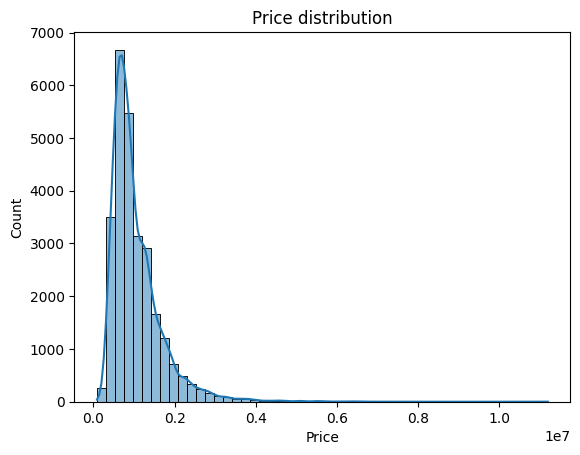

In [128]:
sns.histplot(df['Price'],kde=True,bins=50)
plt.title("Price distribution")
plt.show()

Our target column is highly right skewed which will affect our model


In [129]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

iqr = Q3 - Q1
lowerbound = Q1 - 1.5*iqr
upperbound = Q3 + 1.5*iqr

outliers = df[(df['Price'] < lowerbound) | (df['Price'] > upperbound)]

print(f"Number of outliers : {outliers.shape[0]}")



Number of outliers : 1278


In [130]:
#Applying log transformation to our column to reduce skewness
df['logprice'] = np.log1p(df['Price'])

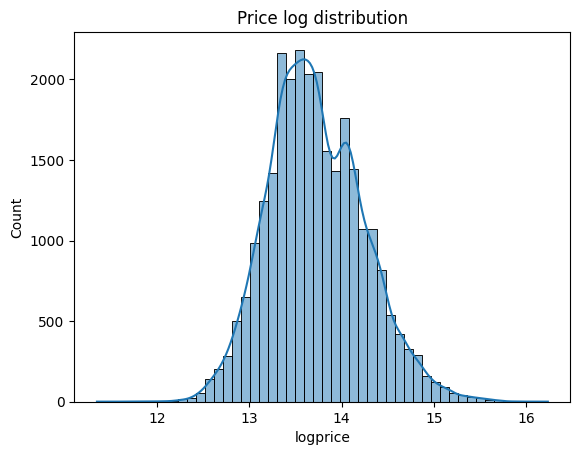

In [131]:
sns.histplot(df['logprice'],kde=True,bins=50)
plt.title("Price log distribution")
plt.show()

In [132]:
#Checking the number of outliers in our logprice column
Q1 = df['logprice'].quantile(0.25)
Q3 = df['logprice'].quantile(0.75)

iqr = Q3 - Q1
lowerbound = Q1 - 1.5*iqr
upperbound = Q3 + 1.5*iqr

outliers = df[(df['logprice'] < lowerbound) | (df['logprice'] > upperbound)]

print(f"Number of outliers : {outliers.shape[0]}")



Number of outliers : 214


The number of outliers have reduced from 1278, and at least our logprice column is normally distributed

In [133]:
df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Distance',
       'Bedroom2', 'Bathroom', 'Car', 'CouncilArea', 'Regionname', 'Month',
       'logprice'],
      dtype='object')

**Type**


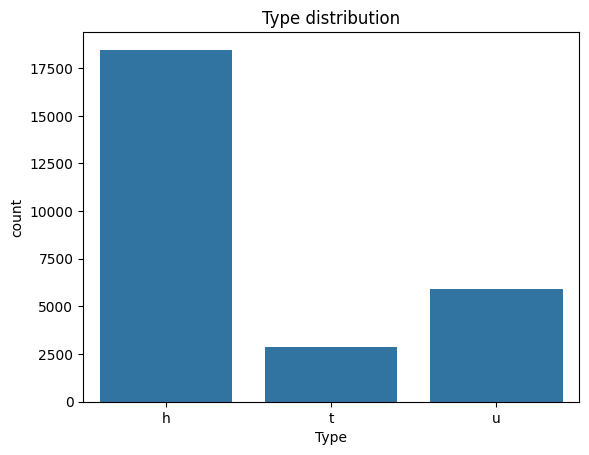

In [134]:

sns.countplot(x='Type',data=df)
plt.title("Type distribution")

plt.show()



Most of the houses are standalone structures

**Rooms**

In [135]:
df['Rooms'].value_counts()

Rooms
3     11956
2      6785
4      5918
5      1209
1      1196
6       137
7        20
8        14
10        5
12        2
16        1
Name: count, dtype: int64

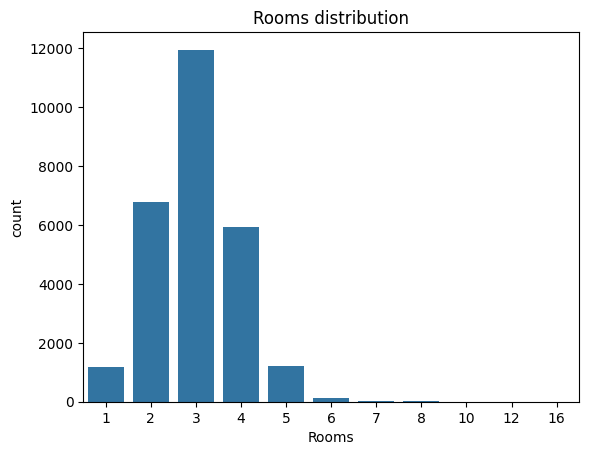

In [136]:
sns.countplot(x='Rooms', data=df)
plt.title("Rooms distribution")
plt.show()

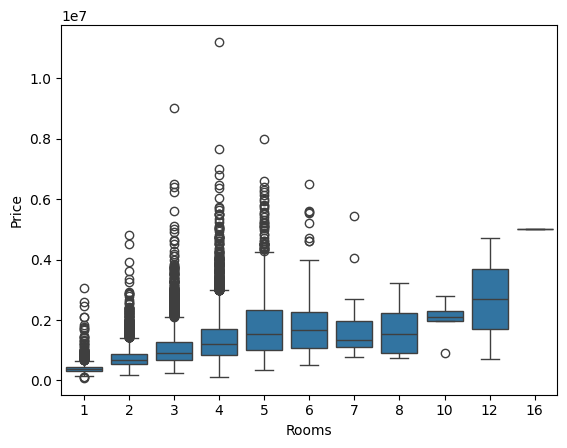

In [137]:
sns.boxplot(x='Rooms',y='Price',data=df)
plt.show()

There are so many outliers indicating that most of the properties still cost higher with the same number of rooms

In [138]:
#Checking the number of outliers in our Rooms column
Q1 = df['Rooms'].quantile(0.25)
Q3 = df['Rooms'].quantile(0.75)

iqr = Q3 - Q1
lowerbound = Q1 - 1.5*iqr
upperbound = Q3 + 1.5*iqr

outliers = df[(df['Rooms'] < lowerbound) | (df['Rooms'] > upperbound)]

print(f"Number of outliers : {outliers.shape[0]}")



Number of outliers : 22


In [139]:
df['Rooms'].value_counts()

Rooms
3     11956
2      6785
4      5918
5      1209
1      1196
6       137
7        20
8        14
10        5
12        2
16        1
Name: count, dtype: int64

In [140]:
df['Rooms'].median()

np.float64(3.0)

In [141]:
df.loc[df['Rooms'] > upperbound, 'Rooms'] = df['Rooms'].median()

In [142]:
df['Rooms'].value_counts()

Rooms
3    11978
2     6785
4     5918
5     1209
1     1196
6      137
7       20
Name: count, dtype: int64

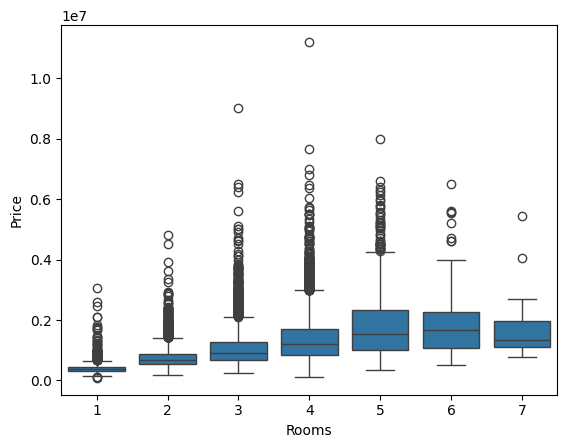

In [143]:
sns.boxplot(x='Rooms',y='Price',data=df)
plt.show()

In [144]:
print(outliers.head(10))

                   Suburb  Rooms Type      Price Method        SellerG  \
616             Ashburton      8    h  2950000.0      S  hockingstuart   
2613              Burwood     10    h  1960000.0      S            Kay   
3288               Coburg      8    u  2250000.0     PI          Peter   
5409   Heidelberg Heights      8    h   770000.0     VB          Miles   
5985                  Kew      8    h  3130000.0      S         Jellis   
7134              Newport      8    h   881000.0      S            Jas   
7590            Parkville      8    u  3210000.0      S          Kelly   
7598            Parkville     10    h  2800000.0     VB         Nelson   
10157   Templestowe Lower      8    h  1150000.0     PI          Barry   
12357       Brighton East      8    h  1880000.0     VB         Buxton   

       Distance  Bedroom2  Bathroom  Car               CouncilArea  \
616        11.0         1         7    4   Boroondara City Council   
2613       11.7         1         2    2     

**Bedrooms**

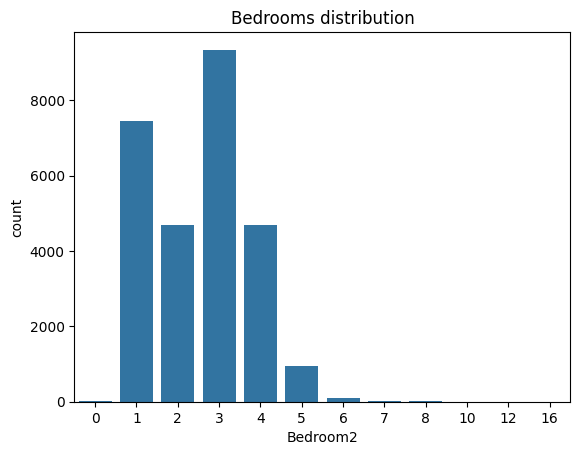

In [145]:
sns.countplot(x='Bedroom2',data = df)
plt.title("Bedrooms distribution")

plt.show()

In [146]:
#Checking the number of outliers in our Bedroom2 column
Q1 = df['Bedroom2'].quantile(0.25)
Q3 = df['Bedroom2'].quantile(0.75)

iqr = Q3 - Q1
lowerbound = Q1 - 1.5*iqr
upperbound = Q3 + 1.5*iqr

outliers = df[(df['Bedroom2'] < lowerbound) | (df['Bedroom2'] > upperbound)]

print(f"Number of outliers : {outliers.shape[0]}")



Number of outliers : 29


In [147]:
df['Bedroom2'].median()

np.float64(3.0)

In [148]:
df.loc[df['Bedroom2'] > upperbound, 'Bedroom2'] = df['Bedroom2'].median()

**Distance**

In [149]:
df['Distance'].dtype

dtype('float64')

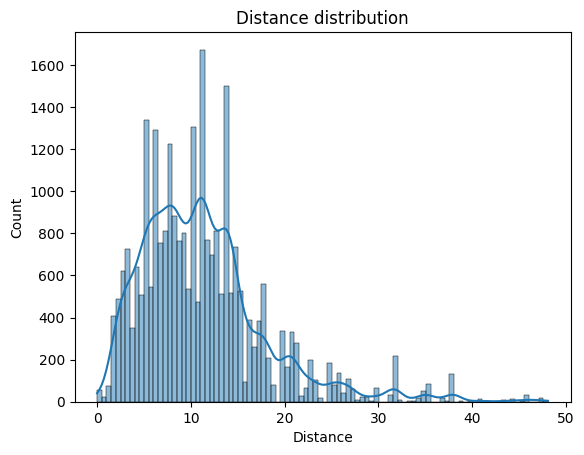

In [150]:
sns.histplot(x='Distance', data=df, kde=True)
plt.title("Distance distribution")

plt.show()

In [151]:
#Checking the number of outliers in our Distance column
Q1 = df['Distance'].quantile(0.25)
Q3 = df['Distance'].quantile(0.75)

iqr = Q3 - Q1
lowerbound = Q1 - 1.5*iqr
upperbound = Q3 + 1.5*iqr

outliers = df[(df['Distance'] < lowerbound) | (df['Distance'] > upperbound)]

print(f"Number of outliers : {outliers.shape[0]}")



Number of outliers : 1188


In [152]:
df['logdistance'] = np.log1p(df['Distance'])

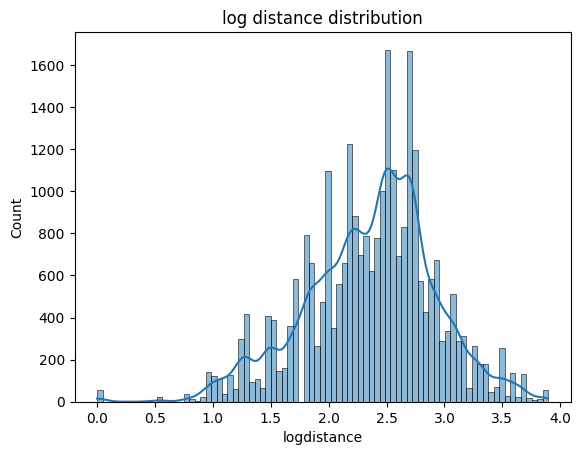

In [153]:
sns.histplot(x='logdistance', data=df, kde=True)
plt.title("log distance distribution")

plt.show()

In [154]:
#Checking the number of outliers in our logdistance column
Q1 = df['logdistance'].quantile(0.25)
Q3 = df['logdistance'].quantile(0.75)

iqr = Q3 - Q1
lowerbound = Q1 - 1.5*iqr
upperbound = Q3 + 1.5*iqr

outliers = df[(df['logdistance'] < lowerbound) | (df['logdistance'] > upperbound)]

print(f"Number of outliers : {outliers.shape[0]}")




Number of outliers : 229


In [155]:
df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Distance',
       'Bedroom2', 'Bathroom', 'Car', 'CouncilArea', 'Regionname', 'Month',
       'logprice', 'logdistance'],
      dtype='object')

## **Bivariate**

In [156]:
df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Distance',
       'Bedroom2', 'Bathroom', 'Car', 'CouncilArea', 'Regionname', 'Month',
       'logprice', 'logdistance'],
      dtype='object')

**Rooms x Prices**

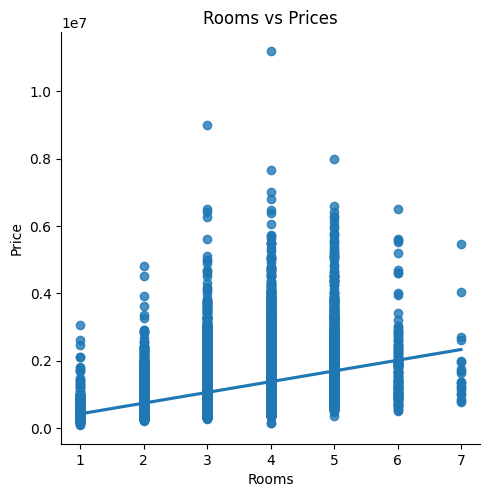

In [157]:
sns.lmplot(x="Rooms", y="Price", data=df)
plt.title("Rooms vs Prices")
plt.show()

As the number of rooms increases the price also increases

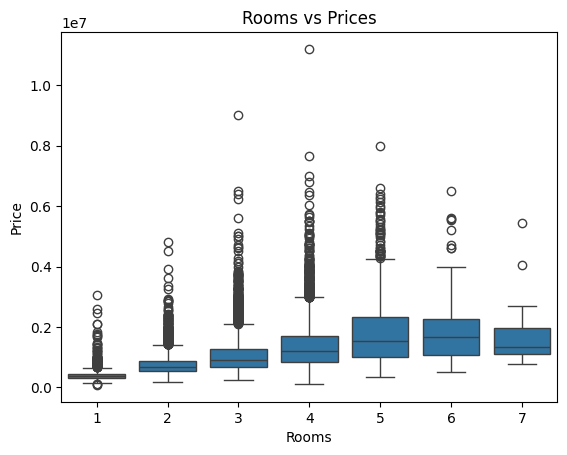

In [158]:
sns.boxplot(x='Rooms',y='Price',data=df)
plt.title("Rooms vs Prices")

plt.show()

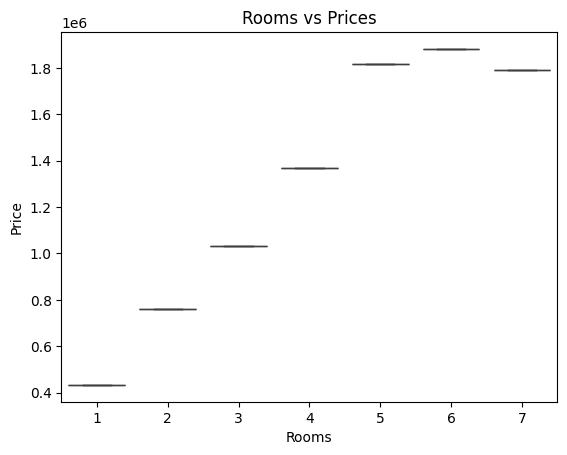

In [159]:
avg_price = df.groupby("Rooms")['Price'].mean().reset_index()
sns.boxplot(x='Rooms', y='Price', data=avg_price)
plt.title("Rooms vs Prices")

plt.show()

As the number of rooms increases the mean prices also increases althoigh for 7 rooms theres a slight decrease in the mean price

**House types vs Prices**

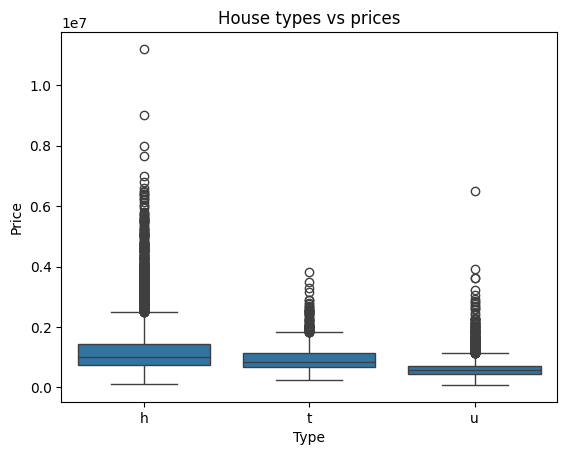

In [160]:
sns.boxplot(x="Type", y='Price', data=df)
plt.title("House types vs prices")

plt.show()

In [161]:
df.groupby('Type')['Price'].mean().sort_values(ascending=False)

Type
h    1.203761e+06
t    9.310772e+05
u    6.279295e+05
Name: Price, dtype: float64

Houses are the most expensive likely because houses have larger land size, they akso have the widest range of values compared to the rest
Townhouses are mid range since they are often newer though with less land and shared walls
Units are the cheapest, often with less land and are smaller



In [162]:
df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Distance',
       'Bedroom2', 'Bathroom', 'Car', 'CouncilArea', 'Regionname', 'Month',
       'logprice', 'logdistance'],
      dtype='object')

**Method**

In [163]:
df['Method'].unique()

['S', 'SP', 'PI', 'VB', 'SA']
Categories (9, object): ['PI', 'PN', 'S', 'SA', ..., 'SP', 'SS', 'VB', 'W']

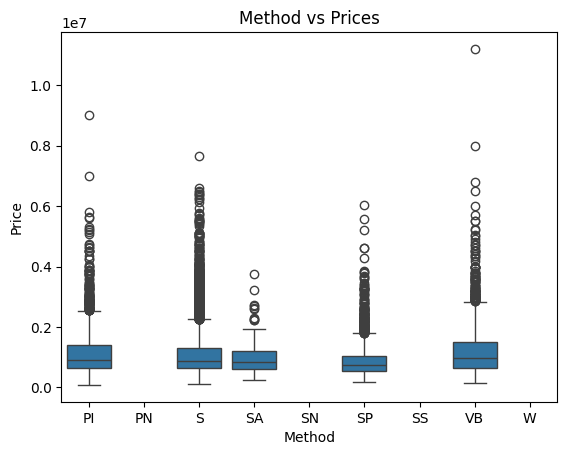

In [164]:
sns.boxplot(x='Method',y='Price', data=df)
plt.title("Method vs Prices")

plt.show()

In [165]:
df.groupby("Method")['Price'].mean().sort_values(ascending=False)

Method
VB    1.194343e+06
PI    1.117884e+06
S     1.051461e+06
SA    9.825047e+05
SP    8.790954e+05
PN             NaN
SN             NaN
SS             NaN
W              NaN
Name: Price, dtype: float64

Vendor bid houses have the highest prices

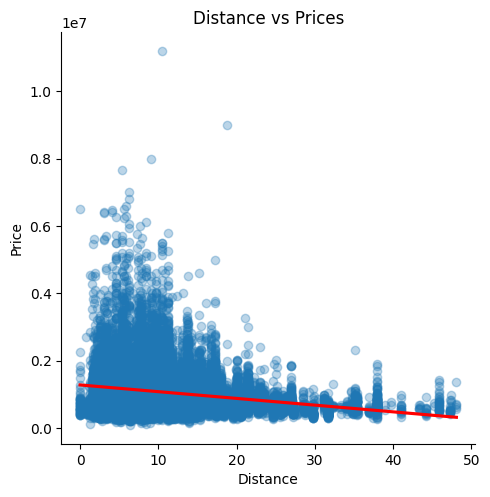

In [166]:
sns.lmplot(x='Distance', y='Price', data=df,scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("Distance vs Prices")

plt.show()

As the distance increases the prices decrease

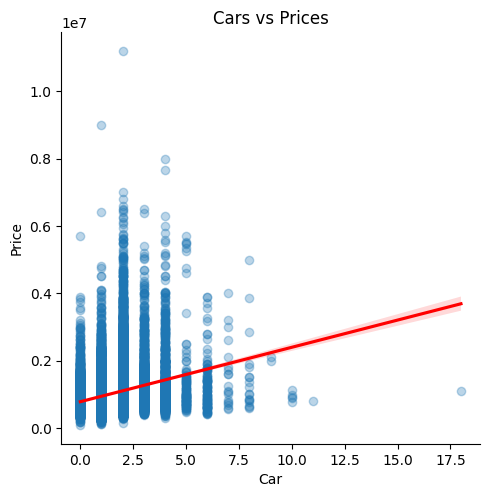

In [167]:
sns.lmplot(x='Car', y='Price', data=df, scatter_kws = {'alpha':0.3}, line_kws={'color':'red'})
plt.title("Cars vs Prices")
plt.show()

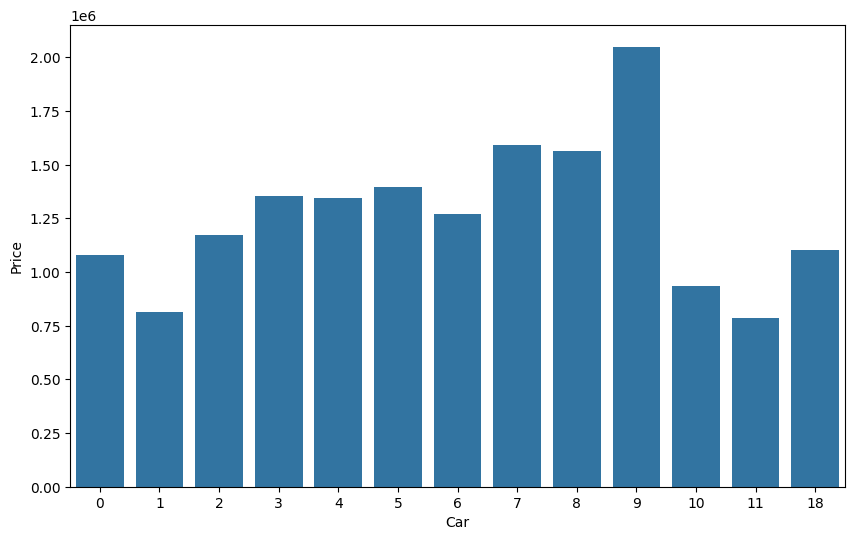

In [168]:
avg_price = df.groupby('Car')['Price'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Car', y='Price', data=avg_price)
plt.show()

Prices increases as the number of car spaces increases, but we can see car spaces don.t really affect our prices that much maybe cause the clients tend to prioritize other features

In [169]:
df['Car'].corr(df['Price'])

np.float64(0.2259849335801374)

In [170]:
df['Regionname'].value_counts()

Regionname
Southern Metropolitan         8524
Northern Metropolitan         7864
Western Metropolitan          5815
Eastern Metropolitan          3272
South-Eastern Metropolitan    1340
Eastern Victoria               166
Northern Victoria              166
Western Victoria                96
Name: count, dtype: int64

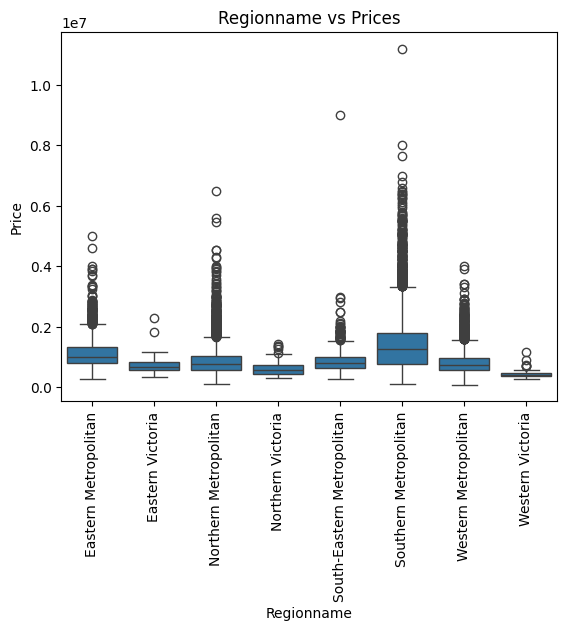

In [171]:
sns.boxplot(x='Regionname',y='Price',data=df)
plt.title("Regionname vs Prices")
plt.xticks(rotation = 90)

plt.show()

Southern Metropolitan has the highest median price and widest price range.It also has several outliers indicating some houses in this region are more expensive
Almost all regions especially the metropolitan ones show outliers indicating high priced properties in those regions 

In [172]:
df.groupby('Regionname')['Price'].mean().sort_values(ascending=False)

Regionname
Southern Metropolitan         1.395928e+06
Eastern Metropolitan          1.108723e+06
South-Eastern Metropolitan    8.773078e+05
Northern Metropolitan         8.614840e+05
Western Metropolitan          8.376153e+05
Eastern Victoria              7.143282e+05
Northern Victoria             6.190512e+05
Western Victoria              4.326068e+05
Name: Price, dtype: float64

**Region Name vs Type**

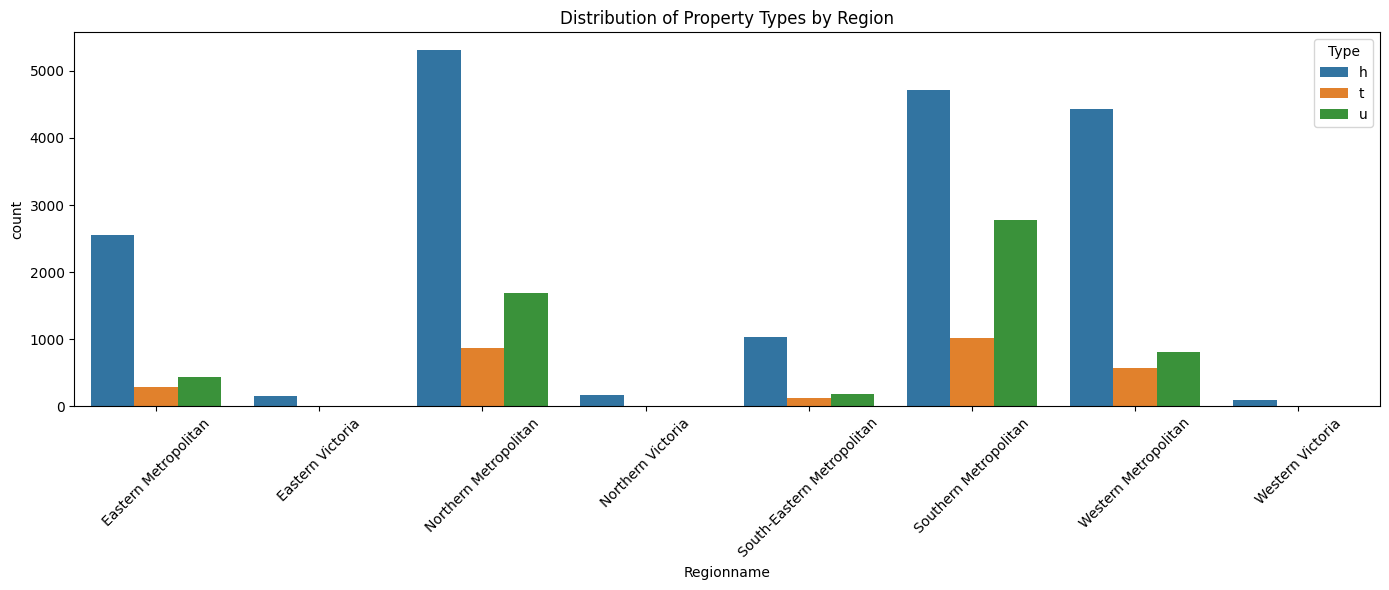

In [173]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='Regionname', hue='Type')
plt.title('Distribution of Property Types by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The victoria regions only have houses types 
Metropolitan regions have all types of houses

**Prices vs Distance vs Property type**

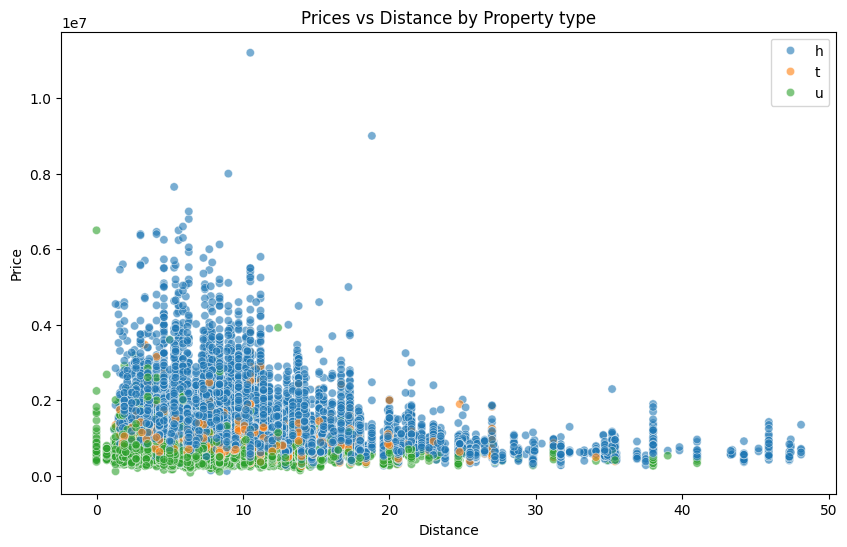

In [174]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Distance',y='Price',data=df,hue='Type',alpha=0.6)
plt.title("Prices vs Distance by Property type")
plt.legend()
plt.show()

In [175]:
# sns.pairplot(df[['Price', 'Distance', 'Rooms', 'Bathroom', 'Car', 'Type']], hue='Type')
# plt.show()


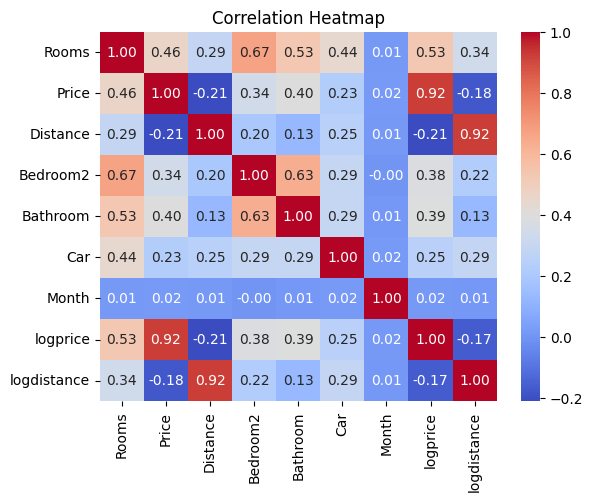

In [176]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr,annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [177]:
df['SellerG'].value_counts(

)

SellerG
Nelson           2735
Jellis           2531
Barry            2393
hockingstuart    2110
Ray              1580
                 ... 
Watermark           0
Bradly              0
WeSell              0
A                   0
voglwalpole         0
Name: count, Length: 388, dtype: int64

In [178]:
top_sellers = df['SellerG'].value_counts().nlargest(5).index
df['SellerG'] = df['SellerG'].apply(lambda x: x if x in top_sellers else 'Other')
df = pd.get_dummies(df, columns=['SellerG'], drop_first=True)


In [179]:
top_suburbs = df['Suburb'].value_counts().nlargest(10).index
df['Suburb'] = df['Suburb'].apply(lambda x: x if x in top_suburbs else 'Other')


In [180]:
transformed_df = df.copy()
categorical_columns = df.select_dtypes(include=["category","object"]).columns

transformed_df = pd.get_dummies(transformed_df,columns=categorical_columns,drop_first=True)



In [181]:
transformed_df.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Month,logprice,logdistance,SellerG_Jellis,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,1480000.0,2.5,2,1,1,12,14.207553,1.252763,False,...,False,True,False,False,True,False,False,False,False,False
2,2,1035000.0,2.5,2,1,0,2,13.849913,1.252763,False,...,False,True,False,False,True,False,False,False,False,False
4,3,1465000.0,2.5,3,2,0,3,14.197366,1.252763,False,...,False,True,False,False,True,False,False,False,False,False
5,3,850000.0,2.5,3,2,1,3,13.652993,1.252763,False,...,False,True,False,False,True,False,False,False,False,False
6,4,1600000.0,2.5,3,1,2,6,14.285515,1.252763,False,...,False,True,False,False,True,False,False,False,False,False


In [182]:
transformed_df.columns

Index(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Month',
       'logprice', 'logdistance', 'SellerG_Jellis', 'SellerG_Nelson',
       'SellerG_Other', 'SellerG_Ray', 'SellerG_hockingstuart',
       'Suburb_Brunswick', 'Suburb_Essendon', 'Suburb_Glen Iris',
       'Suburb_Glenroy', 'Suburb_Northcote', 'Suburb_Other', 'Suburb_Preston',
       'Suburb_Reservoir', 'Suburb_Richmond', 'Suburb_South Yarra', 'Type_t',
       'Type_u', 'Method_PN', 'Method_S', 'Method_SA', 'Method_SN',
       'Method_SP', 'Method_SS', 'Method_VB', 'Method_W',
       'CouncilArea_Bayside City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Cardinia Shire Council', 'CouncilArea_Casey City Council',
       'CouncilArea_Darebin City Council',
       'CouncilArea_Frankston City Council',
       'CouncilArea_Glen Eira City Council',
       'CouncilArea_Greater Dandenong City Council',
       'CouncilArea_Hobsons Bay City Counc

In [183]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27243 entries, 1 to 34856
Data columns (total 73 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Rooms                                       27243 non-null  int64  
 1   Price                                       27243 non-null  float64
 2   Distance                                    27243 non-null  float64
 3   Bedroom2                                    27243 non-null  int64  
 4   Bathroom                                    27243 non-null  int64  
 5   Car                                         27243 non-null  int64  
 6   Month                                       27243 non-null  int32  
 7   logprice                                    27243 non-null  float64
 8   logdistance                                 27243 non-null  float64
 9   SellerG_Jellis                              27243 non-null  bool   
 10  SellerG_Nelson 

# **Train our Model**

# **Linear Regression**

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = transformed_df.drop(columns=['Price','logprice','Distance'])
y = transformed_df['logprice']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

reg = LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_test,y_test)


0.7408565008902848

The correlation between the predicted values and the actual values is 0.7409 which is great for our model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
y_pred = reg.predict(x_test)

r2 = r2_score(y_test,y_pred)
y_test_actual = np.exp(y_test) # You have to do the exponential of the ligprice to transform the prices back to normal
y_pred_actual = np.exp(y_pred)

rmse = np.sqrt(mean_squared_error(y_test_actual,y_pred_actual))

mae = mean_absolute_error(y_test_actual,y_pred_actual)

print(f'R²: {r2:.3f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

R²: 0.741
RMSE: 402520.09
MAE: 227085.73


**Visualzing the actual prices and the predicted prices and the line of best fit**

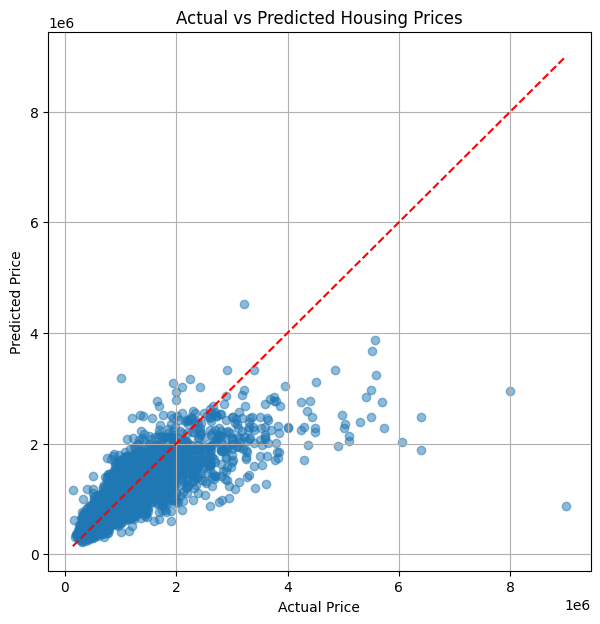

In [ ]:


plt.figure(figsize=(7,7))
plt.scatter(y_test_actual,y_pred_actual,alpha=0.5)
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         color='red', linestyle='--')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Housing Prices")
plt.grid(True)
plt.show()

In [195]:
#Perfoming cross validation to see how well our model perform on different splits
from sklearn.model_selection import cross_val_score

r2_scores = cross_val_score(reg,x,y,cv=5,scoring = 'r2')
print("R2 scores for each fold: ", r2_score)
print("Average R: ", r2_scores.mean())

R2 scores for each fold:  <function r2_score at 0x000002A44F91E840>
Average R:  0.732697599210223


Our model performs well on unseen data

In [ ]:
scores = cross_val_score(reg,x,y,cv=5,scoring='neg_mean_squared_error')

mse_scores = -scores

rmse_scores = np.sqrt(mse_scores)

print("RMSE scores for each fold: ", rmse_scores)
print("Average RMSE: ", rmse_scores.mean())
print("Standard deviation of RMSE: ",rmse_scores.std())

RMSE scores for each fold:  [0.28476308 0.27800343 0.25632009 0.2528288  0.25621676]
Average RMSE:  0.2656264327775155
Standard deviation of RMSE:  0.01310214038816544


In [196]:
from sklearn.model_selection import cross_val_predict
y_pred_log = cross_val_predict(reg,x,y,cv=5)

y_pred_actual = np.exp(y_pred_log)
y_actual = np.exp(y)

rmse_actual = np.sqrt(mean_squared_error(y_actual, y_pred_actual))
print(f"RMSE on actual price scale: {rmse_actual:.2f}")


RMSE on actual price scale: 378101.00


# **Ridge**

In [191]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(x_train,y_train)

y_pred = ridge.predict(x_test)
y_pred_actual = np.exp(y_pred)
y_test_actual = np.exp(y_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
mae = mean_absolute_error(y_test_actual, y_pred_actual)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


R²: 0.741
RMSE: 402565.4303
MAE: 227074.2967


R2: About 74% of the variation in prices can be explained by features used
RMSE: On average the model's predcitions deviate from the actual price by around 402,000 especially when large errors are considered
MSE: On average predictions are off by about $226,000 regardless of whether they're over or under the actual prices

**Cross validation**

In [ ]:
r2_scores = cross_val_score(ridge,x,y,cv=5,scoring='r2')
print("R2 score: ",r2_scores)
print("Average r2 scores: ", r2_scores.mean())

R2 score:  [0.73896905 0.70617759 0.74190092 0.74743065 0.73181995]
Average r2 scores:  0.733259630626614


# **Random Forest Regressor**

In [192]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

y_pred_actual = np.exp(y_pred)
y_test_actual = np.exp(y_test)

r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual,y_pred_actual))
mae = mean_absolute_error(y_test_actual,y_pred_actual)

print(f"R2: {r2: .3f}" )
print(f"RMSE: {rmse: .4f}")
print(f"MSE: {mae: .4f}")


R2:  0.787
RMSE:  363363.0483
MSE:  206457.2339


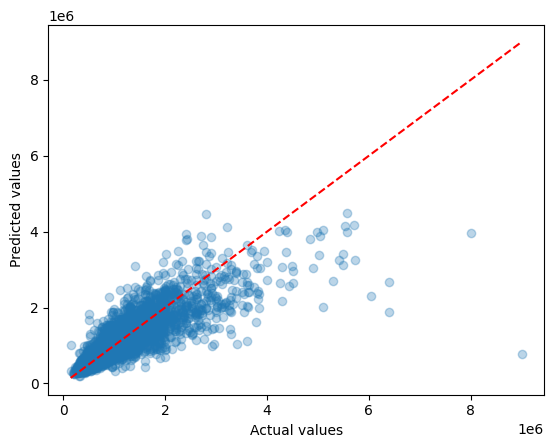

In [193]:
plt.scatter(y_test_actual,y_pred_actual,alpha=0.3)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(),y_test_actual.max()], 'r--')
plt.show()

**Cross Validation**

In [197]:
r2_scores = cross_val_score(rf,x,y,cv=5,scoring='r2')
print("R2 scores: ",r2_scores)
print("Average r2", r2_scores.mean())

R2 scores:  [0.76215315 0.71476779 0.79680218 0.79247476 0.76852708]
Average r2 0.7669449909291671


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True,random_state=42)
cv_results = cross_val_score(rf,x,y,cv=kf)

print("R2_score", cv_results)
print("Average r2: ", cv_results.mean())

R2_score [0.78606398 0.79486253 0.79295833 0.79512974 0.78342698]
Average r2:  0.7904883106684377


# **Lasso**

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.0001)
lasso.fit(x_train,y_train)
y_pred = lasso.predict(x_test)

y_pred_actual = np.exp(y_pred)
y_test_actual = np.exp(y_test)

r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual,y_pred_actual))
mae = mean_absolute_error(y_test_actual,y_pred_actual)

print(f"R2: {r2: .3f}" )
print(f"RMSE: {rmse: .4f}")
print(f"MSE: {mae: .4f}")


R2:  0.742
RMSE:  402211.1056
MSE:  226469.4680


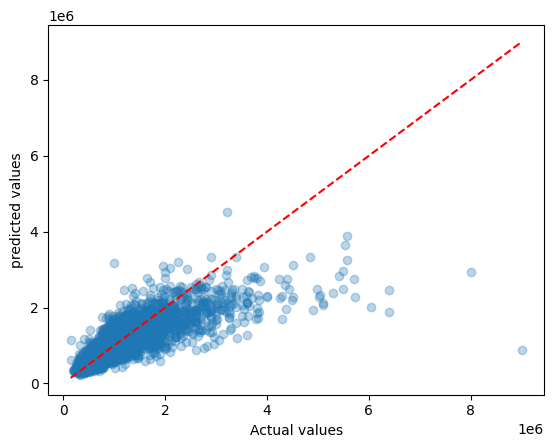

In [ ]:
plt.scatter(y_test_actual,y_pred_actual,alpha=0.3)
plt.xlabel("Actual values")
plt.ylabel("predicted values")

plt.plot([y_test_actual.min(),y_test_actual.max()],[y_test_actual.min(),y_test_actual.max()],'r--')

plt.show()

In [ ]:
importance = pd.Series(lasso.coef_,index=x.columns)
print(importance.sort_values().head(30))



Type_u                                       -0.523783
CouncilArea_Wyndham City Council             -0.394211
CouncilArea_Melton City Council              -0.325440
CouncilArea_Hume City Council                -0.266339
CouncilArea_Brimbank City Council            -0.239358
Type_t                                       -0.220509
logdistance                                  -0.200833
Regionname_Western Victoria                  -0.170376
Regionname_Northern Metropolitan             -0.162985
Regionname_Northern Victoria                 -0.161123
CouncilArea_Whittlesea City Council          -0.160843
Suburb_Glenroy                               -0.143824
Regionname_Western Metropolitan              -0.121848
CouncilArea_Maribyrnong City Council         -0.105764
Suburb_Reservoir                             -0.100004
SellerG_Ray                                  -0.049933
Regionname_South-Eastern Metropolitan        -0.030788
Regionname_Southern Metropolitan             -0.030459
SellerG_ho

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
lasso = Lasso()
grid = GridSearchCV(lasso, params, cv=5, scoring='r2')
grid.fit(x_train, y_train)

print("Best alpha:", grid.best_params_['alpha'])
print("Best CV score:", grid.best_score_)

best_lasso = grid.best_estimator_
y_pred = best_lasso.predict(x_test)

# Evaluate as before...


Best alpha: 0.0001
Best CV score: -0.7429644034102364


### **Our best model is RandomForest Regressor**